In [27]:
%matplotlib inline

In [25]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.metrics import average_precision_score, f1_score, roc_auc_score

from helpers import load_cascades
from graph_helpers import load_graph_by_name
from eval_helpers import aggregate_scores_over_cascades_by_methods

In [36]:
graph_name = 'lattice-1024'
obs_frac = 0.5
data_id = '{}-mic-s0.02-o{}'.format(graph_name, obs_frac)
sampling_method = 'loop_erased'
inf_dirname = 'inf_probas-weighted'
query_dirname = 'queries-weighted'
cascade_dirname = 'cascade-weighted'
inf_result_dirname = 'outputs/{}/{}/{}'.format(inf_dirname,
                                               data_id,
                                               sampling_method)
query_dirname = 'outputs/{}/{}/{}'.format(query_dirname,
                                          data_id,
                                          sampling_method)
n_queries = 10

In [37]:
g = load_graph_by_name(graph_name)
cascades = load_cascades('{}/{}'.format(cascade_dirname, data_id))


load graph from data/lattice-1024/graph.gt


In [38]:
query_dir_ids = ['prediction_error']
inf_dir_ids = ['prediction_error']
labels = ['prederror']

In [39]:
eval_func = average_precision_score

In [40]:
scores_by_method = aggregate_scores_over_cascades_by_methods(
    cascades,
    labels,
    query_dir_ids,
    inf_dir_ids,
    n_queries,
    inf_result_dirname,
    query_dirname,
    eval_func,
    True)

96it [00:01, 65.05it/s]


In [47]:
cascades = load_cascades('{}/{}'.format(cascade_dirname, data_id))
paths = [tpl[0] for tpl in cascades]
scores_with_path = list(zip(scores_by_method['prederror'], paths))

In [49]:
most_decreasing_experiment = max(scores_with_path, key=lambda tpl: tpl[0][0] - tpl[0][-1])

In [51]:
print('path', most_decreasing_experiment[1])

path cascade-weighted/lattice-1024-mic-s0.02-o0.5/9.pkl


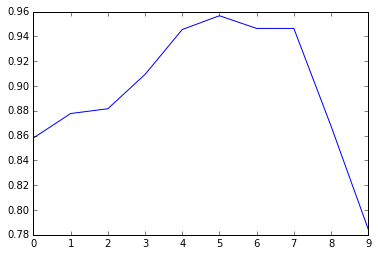

In [52]:
ax = plt.subplot()

ax.plot(most_decreasing_experiment[0])
# for y in scores[:5]:
#     ax.plot(y)
    